# Coding Etiquette & Excel Reporting
## Content: 

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Import orders_products_customers_merged df

orders_prods_custs_merge = pd.read_pickle (r"C:\Users\thoms\Desktop\Data Analytics\Achievement 4\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers_merged.pkl")

In [3]:
# Create path

path = r'C:\Users\thoms\Desktop\Data Analytics\Achievement 4\Instacart Basket Analysis'

In [4]:
orders_prods_custs_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependents,family_status,income
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Question 2: 
## Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

### There is a security risk with all customers and their sensitive data. This would be something to talk to a senior consultant about but I believe the names and the address columns should be delete, as this data is not nessacery for making the analysis needed by the customer as per the brief. However, in say that we definitely have to keep the states is important when looking at the region from where the customer comes from. 

# Question 3: The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
## Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
## Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [5]:
# show all states of the df

orders_prods_custs_merge['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [6]:
# Create groups of states in a region using if statement. 

region = []

for value in orders_prods_custs_merge['state']:
    if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
        region.append('Northeast')
    elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        region.append('Midwest')
    elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
        region.append('South')
    else:
        region.append('West')

In [7]:
# create column region

orders_prods_custs_merge['region'] = region

In [8]:
# check regions

orders_prods_custs_merge['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [10]:
# check region column

orders_prods_custs_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,number_of_dependents,family_status,income,region
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [11]:
crosstab = pd.crosstab(orders_prods_custs_merge['region'], orders_prods_custs_merge['spending_flag'], dropna = False)

In [12]:
crosstab

spending_flag,Higher Spender,Low spender
region,,
Midwest,8090,7589235
Northeast,5993,5716743
South,10357,10781528
West,9055,8283858


### Some reason my spending flag has not come out like it should 



# Question 4: The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample

In [14]:
# Create falg for low spending customer

orders_prods_custs_merge.loc[orders_prods_custs_merge['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'

In [15]:
orders_prods_custs_merge.loc[orders_prods_custs_merge['max_order'] >= 5, 'exclusion_flag'] = 'Normal activity customer'

In [16]:
orders_prods_custs_merge['exclusion_flag'].value_counts(dropna = False)

Normal activity customer    30964564
Low activity customer        1440295
Name: exclusion_flag, dtype: int64

In [17]:
# create DF to exclude the low spending customer

orders_prods_custs_merge_normal = orders_prods_custs_merge[orders_prods_custs_merge['exclusion_flag'] == 'Normal activity customer']

In [18]:
orders_prods_custs_merge_normal['max_order'].value_counts(dropna = False)

99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
93      50333
90      48328
97      44949
98      44587
96      40453
Name: max_order, Length: 95, dtype: int64

In [19]:
orders_prods_custs_merge_normal.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_normal_activity.pkl'))

# Question 5: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [20]:
orders_prods_custs_merge['age'].value_counts()

49    531360
79    529742
48    529728
31    528551
64    528009
       ...  
60    484416
36    483812
66    476219
41    475225
25    472188
Name: age, Length: 64, dtype: int64

In [21]:
orders_prods_custs_merge['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [22]:
# the ages groups are set at 
# min age of 18 years old
#average age of 49 years old
# max age of 81 years old 

In [23]:
# Creating an 'age' list

age_profile_list = []

for value in orders_prods_custs_merge['age']:
    if (value >= 18) and (value <= 24):
        age_profile_list.append('18-24')
    elif (value >= 25) and (value <= 34):
        age_profile_list.append('25-34')
    elif (value >= 35) and (value <= 44):
        age_profile_list.append('35-44')
    elif (value >= 45) and (value <= 54):
        age_profile_list.append('45-54')
    elif (value >= 55) and (value <= 64):
        age_profile_list.append('55-64')
    elif (value >= 65) and (value <= 74):
        age_profile_list.append('65-74')
    elif (value >= 75) and (value <= 84):
        age_profile_list.append('75-84')
    elif (value >= 85):
        age_profile_list.append('85+')

In [24]:
# create age list column

orders_prods_custs_merge['age_profile'] = age_profile_list

In [25]:
orders_prods_custs_merge['age_profile'].value_counts().sort_index()

18-24    3573001
25-34    5054654
35-44    5062429
45-54    5111126
55-64    5028565
65-74    5005001
75-84    3570083
Name: age_profile, dtype: int64

In [26]:
orders_prods_custs_merge['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [27]:
# the ages groups are set at 
# min age of 25903
#average age of  99437
# max age of 59390

In [29]:
# Create 'income' list

income_profile_list = []

for value in orders_prods_custs_merge['income']:
    if value < 25000:
        income_profile_list.append('0-25000')
    elif (value >= 25000) and (value <= 50000):
        income_profile_list.append('25000-50000')
    elif (value >= 50000) and (value <= 75000):
        income_profile_list.append('50000-75000')
    elif (value >= 75000) and (value <= 100000):
        income_profile_list.append('75000-100000')
    elif (value >= 100000) and (value <= 125000):
        income_profile_list.append('100000-125000')
    elif (value >= 125000) and (value <= 150000):
        income_profile_list.append('125000-150000')
    elif (value >= 150000) and (value <= 175000):
        income_profile_list.append('150000-175000')
    elif (value >= 175000) and (value <= 200000):
        income_profile_list.append('175000-200000')
    elif (value >= 200000) and (value <= 300000):
        income_profile_list.append('200000-300000')
    elif (value >= 300000) and (value <= 400000):
        income_profile_list.append('300000-400000')
    elif (value >= 400000) and (value <= 500000):
        income_profile_list.append('400000-500000')
    elif value >= 500000:
        income_profile_list.append('500000+')

In [30]:
orders_prods_custs_merge['income_profile'] = income_profile_list

In [31]:
orders_prods_custs_merge['income_profile'].value_counts()

75000-100000     7147837
50000-75000      6848737
100000-125000    6183245
125000-150000    4580117
150000-175000    3743496
25000-50000      3594083
200000-300000     156820
300000-400000      53931
175000-200000      48901
400000-500000      28337
500000+            19355
Name: income_profile, dtype: int64

In [32]:
orders_prods_custs_merge['number_of_dependents'].value_counts().sort_index()

0    8097503
1    8081104
2    8091143
3    8135109
Name: number_of_dependents, dtype: int64

In [33]:
# Create 'dependents' on parent list

dependents_profile_list = []

for value in orders_prods_custs_merge['number_of_dependents']:
    if value == 0:
        dependents_profile_list.append('single_adult')
    else:
        dependents_profile_list.append('young_parent')

In [34]:
# Assign dependents list to column

orders_prods_custs_merge['dependents_profile'] = dependents_profile_list

In [35]:
orders_prods_custs_merge['dependents_profile'].value_counts()

young_parent    24307356
single_adult     8097503
Name: dependents_profile, dtype: int64

# Question 6: Create an appropriate visualization to show the distribution of profiles.

Text(0, 0.5, 'the frequency of age')

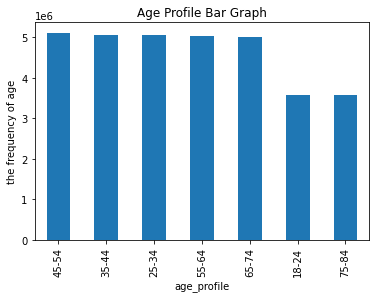

In [36]:
age_bar_chart = orders_prods_custs_merge['age_profile'].value_counts().plot.bar()

plt.title('Age Profile Bar Graph')
plt.xlabel('age_profile')
plt.ylabel('the frequency of age')

In [38]:
age_bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_bar_chart.png'))

Text(0, 0.5, 'the frequency of income per customer')

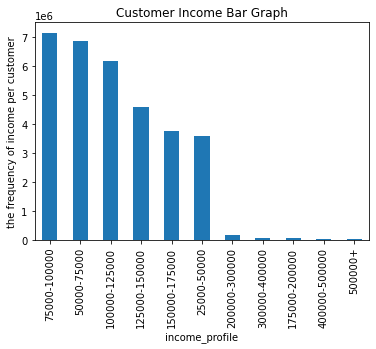

In [41]:
income_chart = orders_prods_custs_merge['income_profile'].value_counts().plot.bar()

plt.title('Customer Income Bar Graph')
plt.xlabel('income_profile')
plt.ylabel('the frequency of income per customer')

In [42]:
income_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_distribution.png'))

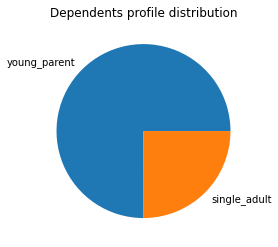

In [43]:
dependents_chart = orders_prods_custs_merge['dependents_profile'].value_counts().plot.pie(title = 'Dependents profile distribution', ylabel='')

In [44]:
dependents_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependents_profile_distribution.png'))

# Question 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [45]:
# Number of orders with age

orders_prods_custs_merge.groupby('age_profile').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                    mean min max
age_profile                     
18-24          17.282836   1  99
25-34          17.007055   1  99
35-44          17.194347   1  99
45-54          17.174680   1  99
55-64          17.168240   1  99
65-74          17.085593   1  99
75-84          17.115978   1  99

In [46]:
# Income class with number of orders

orders_prods_custs_merge.groupby('income_profile').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                       mean min max
income_profile                     
100000-125000     17.271478   1  99
125000-150000     17.117874   1  99
150000-175000     17.290060   1  99
175000-200000     19.145743   1  99
200000-300000     19.561127   1  99
25000-50000       15.896069   1  99
300000-400000     20.869333   1  99
400000-500000     18.736775   1  99
50000-75000       17.350705   1  99
500000+           19.393128   1  99
75000-100000      17.288477   1  99

In [47]:
# Age with days since prior orders

orders_prods_custs_merge.groupby('age_profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_profile                                  
18-24                    11.057388  0.0  30.0
25-34                    11.165556  0.0  30.0
35-44                    11.084533  0.0  30.0
45-54                    11.092368  0.0  30.0
55-64                    11.150466  0.0  30.0
65-74                    11.078467  0.0  30.0
75-84                    11.078885  0.0  30.0

# Question 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [48]:
# regions vs departments

region_departments = pd.crosstab(orders_prods_custs_merge['region'], orders_prods_custs_merge['department_id'], dropna = False)

In [49]:
region_departments

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
region,,,,,,,,,,,,,,,,,,,,,
Midwest,524096,8420,273869,2227937,36186,63736,625574,22355,203769,8193,...,166129,442101,163551,250702,1264223,175824,98983,673715,245678,16535
Northeast,390918,6585,208599,1665839,26542,46891,483418,18601,151816,5802,...,124620,329445,123574,186755,954026,131485,75139,514675,186817,12374
South,747900,12212,388815,3160551,51624,89142,898940,31269,287444,11533,...,235752,622436,234251,356015,1796969,243070,143654,957346,349419,23193
West,571829,9074,301145,2424964,39344,69484,680191,25491,223598,9045,...,182426,481387,181657,274586,1383529,188287,106026,741814,269335,17043


In [50]:
# allow for all columns

pd.set_option("display.max_columns", None)

In [51]:
region_departments

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
region,,,,,,,,,,,,,,,,,,,,,
Midwest,524096,8420,273869,2227937,36186,63736,625574,22355,203769,8193,105749,166129,442101,163551,250702,1264223,175824,98983,673715,245678,16535
Northeast,390918,6585,208599,1665839,26542,46891,483418,18601,151816,5802,78815,124620,329445,123574,186755,954026,131485,75139,514675,186817,12374
South,747900,12212,388815,3160551,51624,89142,898940,31269,287444,11533,150350,235752,622436,234251,356015,1796969,243070,143654,957346,349419,23193
West,571829,9074,301145,2424964,39344,69484,680191,25491,223598,9045,112658,182426,481387,181657,274586,1383529,188287,106026,741814,269335,17043


In [54]:
# spending across departments

spending_departments = pd.crosstab(orders_prods_custs_merge['spending_flag'], orders_prods_custs_merge['department_id'], dropna = False)

In [55]:
spending_departments

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
spending_flag,,,,,,,,,,,,,,,,,,,,,
Higher Spender,1230,66,619,5763,462,47,7361,55,213,75,340,113,987,778,450,2721,1041,45,10463,646,20
Low spender,2233513,36225,1171809,9473528,153234,269206,2680762,97661,866414,34498,447232,708814,1874382,702255,1067608,5396026,737625,423757,2877087,1050603,69125


In [56]:
# spending across regions

spending_region = pd.crosstab(orders_prods_custs_merge['region'], orders_prods_custs_merge['spending_flag'], dropna = False)

In [57]:
spending_region

spending_flag,Higher Spender,Low spender
region,,
Midwest,8090,7589235
Northeast,5993,5716743
South,10357,10781528
West,9055,8283858


Text(0, 0.5, 'Count of customer per 1 million')

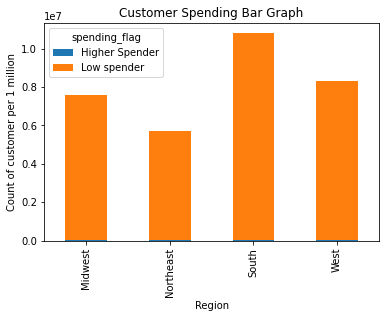

In [61]:
spending_region_chart = spending_region.plot.bar(stacked = True, title = 'Types of Spenders, by Region')

plt.title('Customer Spending Bar Graph')
plt.xlabel('Region')
plt.ylabel('Count of customer per 1 million')

In [62]:
orders_prods_custs_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_Part_1.pkl'))